In [1]:
#Importing all necessaries libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as rs

In [2]:
#Loading the dataset
mif=pd.read_csv('insurance.csv')    #Reading the dataset and storing to the object mif and it is the name of my dataset
mif.head()                          #mif.head() returns the starting 5 rows of the dataset.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Getting the information of the dataset
mif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Extracting all the columns of the dataset
mif.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
#Knowing about the column datatypes of the dataframe
##For Numeric Columns
mif._get_numeric_data()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [6]:
## For Categorical Columns
for i in mif.columns:
    if(mif[i].dtypes=='O'):
        print(i)

sex
smoker
region


In [7]:
#Checking the description of the dataframe.
mif.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Checking for Null and Missing Values
mif.isnull().sum()
#When we look at the output below we can infer that our dataset does not contain any missing values or null values.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Checking for all the unique values in the dataset.
#mif.nunique()[mif.nunique()>10]
mif.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

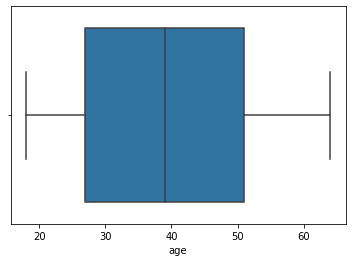

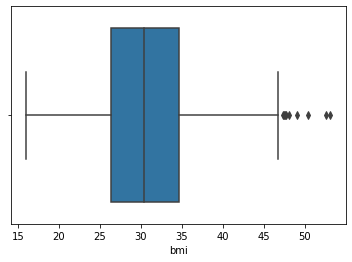

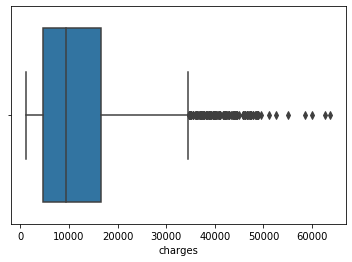

In [10]:
#For Continous Variables using Box-plot
for i in mif.nunique()[mif.nunique()>10].index:
    sns.boxplot(x=mif[i])
    plt.show()     

In [11]:
#From the above boxplot we can see that age has no outliers but bmi has outliers which is not much but the charges 
#column have alot of outliers

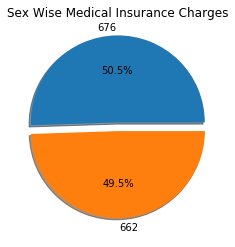

In [12]:
#For Categorical Variables
plt.pie(x=mif['sex'].value_counts(),labels=mif['sex'].value_counts(),explode=[0.1,0],autopct="%1.1f%%",shadow=True)
plt.title("Sex Wise Medical Insurance Charges")
plt.show()

In [13]:
#From the above pie chart  we can see that the medical insurance charges of female are more than that of males.

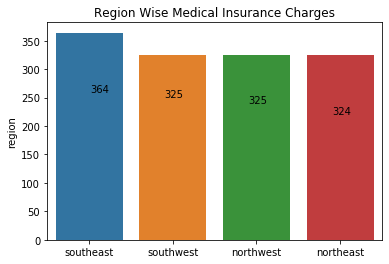

In [14]:
sns.barplot(y=mif['region'].value_counts(),x=mif['region'].value_counts().index,data=mif)
plt.title("Region Wise Medical Insurance Charges")
plt.text(0.01,260,mif['region'].value_counts()[0])
plt.text(0.9,250,mif['region'].value_counts()[1])
plt.text(1.9,240,mif['region'].value_counts()[2])
plt.text(2.9,220,mif['region'].value_counts()[3])
plt.show()

In [15]:
#The above barplot shows the region wise medical insurance charges although there is not much difference based on region but southeast has most medical insurances cases.

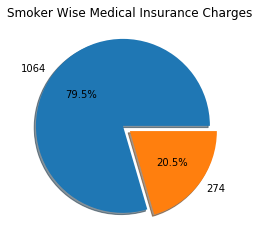

In [16]:
plt.pie(x=mif['smoker'].value_counts(),labels=mif['smoker'].value_counts(),explode=[0.1,0],autopct="%1.1f%%",shadow=True)
plt.title("Smoker Wise Medical Insurance Charges")
plt.show()

In [17]:
#The above pie chart shows that evidently that people who are smokes tend to take more medical insurance than the non-smokers.

## Bi-Variate Analysis

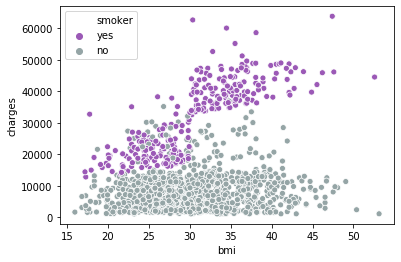

In [18]:
#Continous-Continous Columns
sns.scatterplot(x=mif['bmi'],y=mif['charges'],data=mif,hue='smoker',palette=['#9b59b6','#95a5a6'])
plt.show()

In [19]:
#The above scatterplot is plotted between bmi and charges and it also plots smoker and non-smokers. 
#It is quite evident from te scatterplot that smokers have high medical insurance costs irrespective of their bmi.

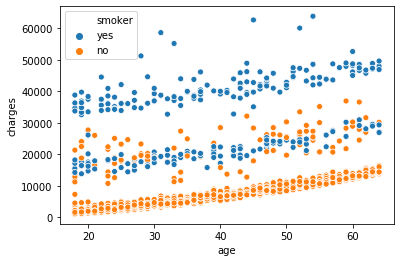

In [20]:
sns.scatterplot(x=mif['age'],y=mif['charges'],data=mif,hue='smoker')
plt.show()

In [21]:
#The above plots states that age does not matter the charges but the smokers always will have high medical insurance charges.

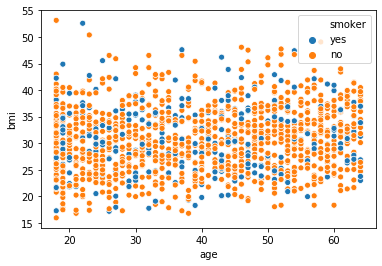

In [22]:
sns.scatterplot(x=mif['age'],y=mif['bmi'],data=mif,hue='smoker')
plt.show()

In [23]:
#The above scatterplot bmi is not affected by age and the people who smoke or not.

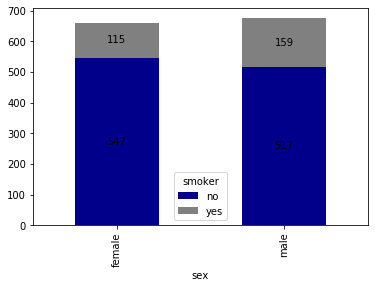

In [24]:
#For categorical-Categorical Features
ax = pd.crosstab(mif['sex'],mif['smoker']).plot(kind='bar',stacked=True,color=['darkblue','grey'])
for p in ax.patches:
    #print(p)
    width, height = p.get_width(), p.get_height()
    #print(width,height)
    x, y = p.get_xy() 
    #print(x,y)
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

In [25]:
#The above chart shows us the male and female count along with the count of smokers in both the categories.
#We can infer that there is not much difference on the gender because nowdays smoking is common among both male and females.

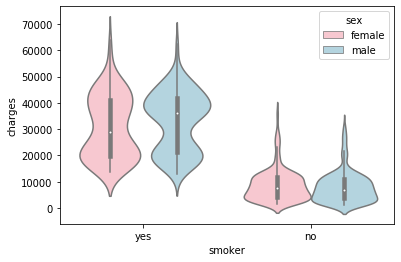

In [26]:
#Continous-Categorical
sns.violinplot(mif['smoker'],y=mif['charges'],data=mif,hue='sex',palette=['pink','lightblue'])
plt.show()

In [27]:
#From the above violinplot we can say that the  median of charges for non-smokers are same for both male and female.
# The  median of charges for smokers are higher for males and less for females.

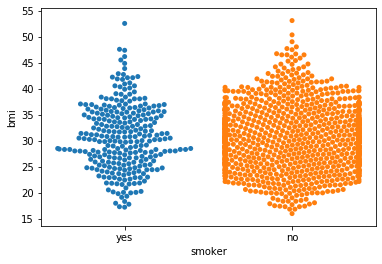

In [28]:
sns.swarmplot(mif['smoker'],mif['bmi'],data=mif)
plt.show()

In [29]:
#From the above plot we can infer that being a smoker does not affect the bmi of the person.

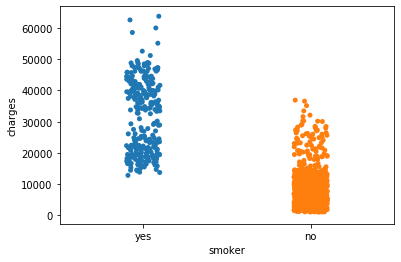

In [30]:
sns.stripplot(x=mif['smoker'],y=mif['charges'],data=mif)
plt.show()

In [31]:
#From the above plot we can infer that being a smoker does  affect the charges of the person.

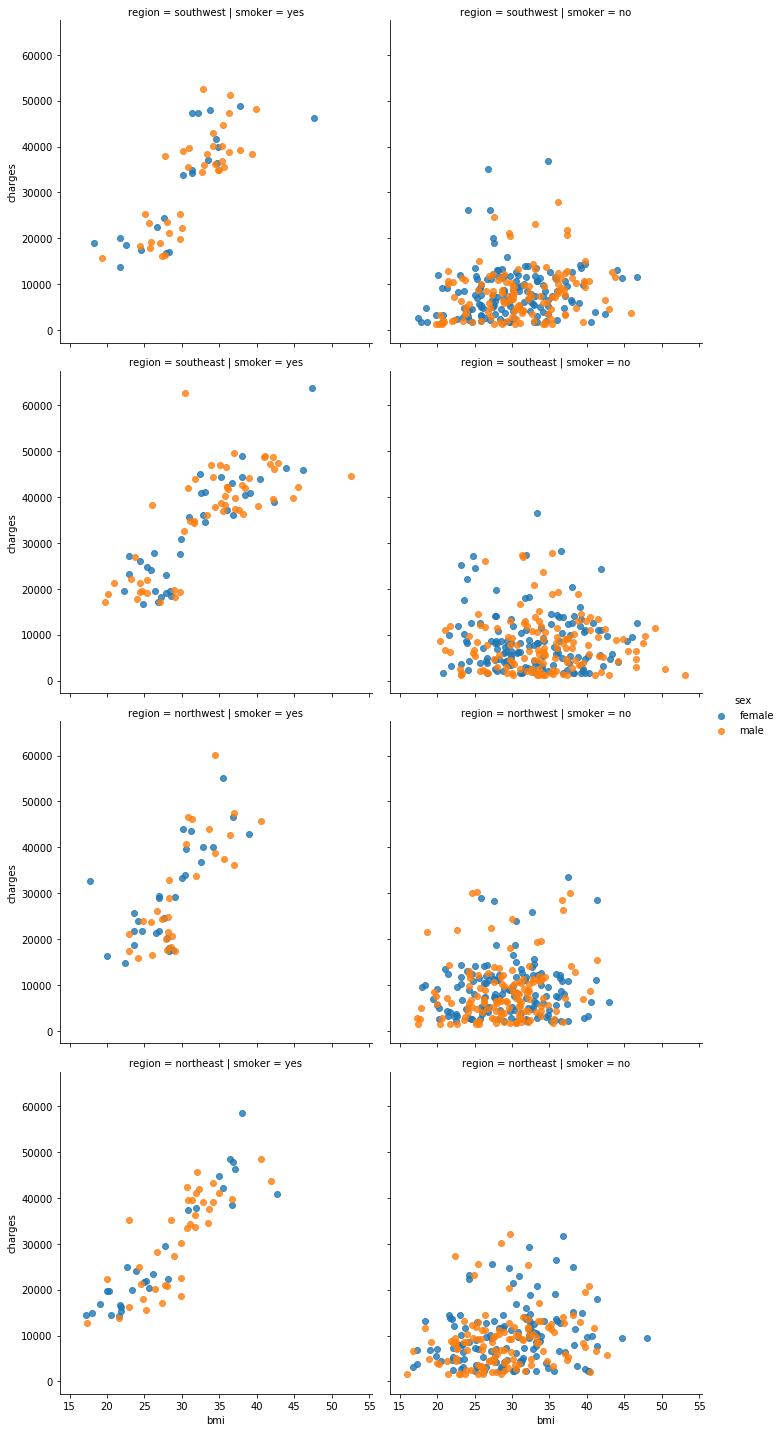

In [32]:
sns.lmplot('bmi','charges',mif,hue='sex',fit_reg=False,col='smoker',row='region')
plt.show()

In [33]:
#From the above plot we can infer that in all the regions irrespective of gender the medical insurance charges of smokers are very high.

C:\Users\ACER.LAPTOP-22S9AGAP\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


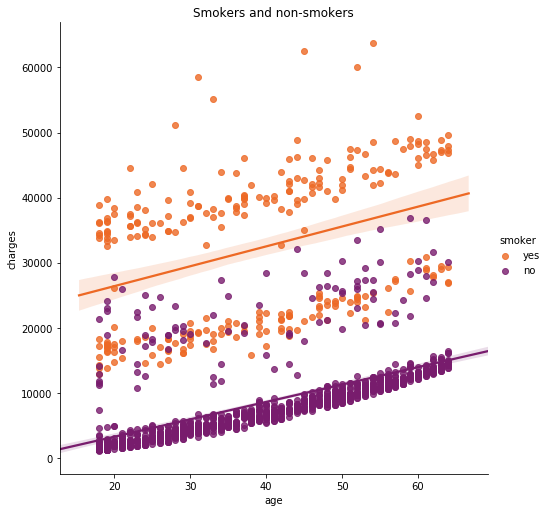

In [34]:
sns.lmplot(x="age", y="charges", hue="smoker", data=mif, palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')
plt.show()

In [35]:
#From the above graph we can see that we have all people who have age 18+ are smokers and their charges are considerably high when compared to non-smokers.

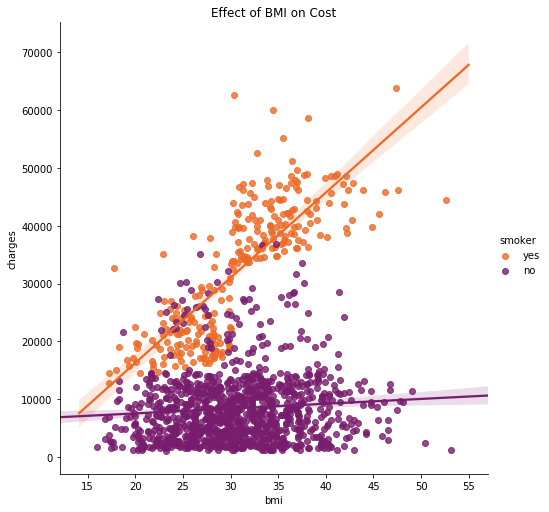

In [36]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=mif, palette = 'inferno_r', size = 7)
plt.title("Effect of BMI on Cost")
plt.show()

In [37]:
#In the above plot, we can observe that for non-smokers, BMI has nearly no effect on cost. For smokers, however,we see a  strong trend

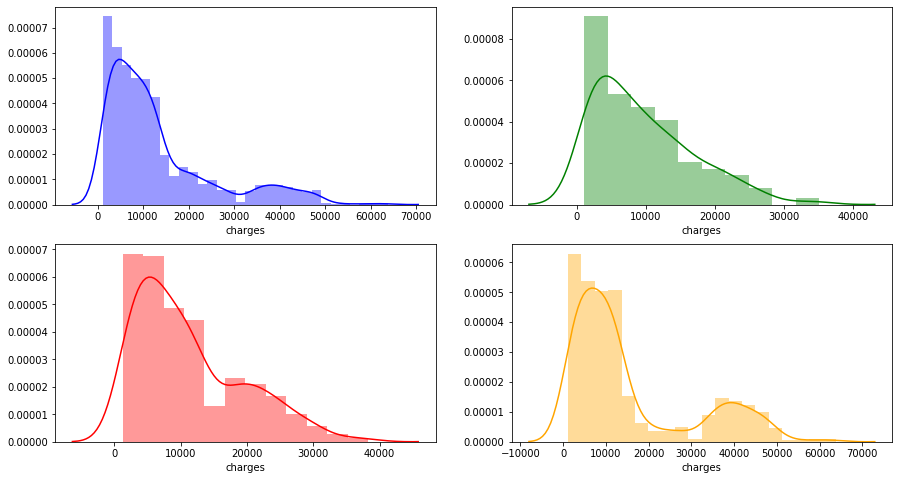

In [38]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.distplot(mif['charges'], color = 'b',ax=ax[0][0])
sns.distplot(mif[mif.bmi <=24]['charges'], color = 'g',ax=ax[0][1])
sns.distplot(mif[(mif.bmi > 24)&(mif.bmi<=30)]['charges'], color = 'r',ax=ax[1][0])
sns.distplot(mif[mif.bmi >30]['charges'], color = 'orange',ax=ax[1][1])
plt.show()

In [39]:
#From the above countplot we can say that although overcall bmi has no effect on charges 
#but when we group the data on the basis of bmi range we can say that as the bmi increases the medical insurance 
#charges also increases. This also validates our point that the cost will be high for people who are smokers and have high bmi.

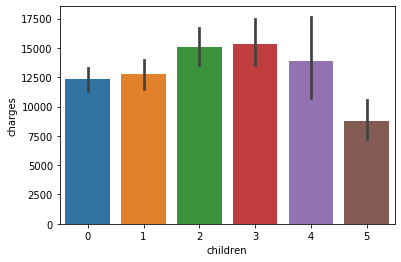

In [40]:
sns.barplot(x='children',y='charges',data=mif)
plt.show()

In [41]:
#From the bar plot we can see that people have who have 2 or 3 children have more medical insurance costs but people with 5 
#children have low medical insurance cost. Similary for people with 0 children have more medical insurance costs.
#So we can say that children do not play an important role on medical insurance cost.

# Multivariate Analysis

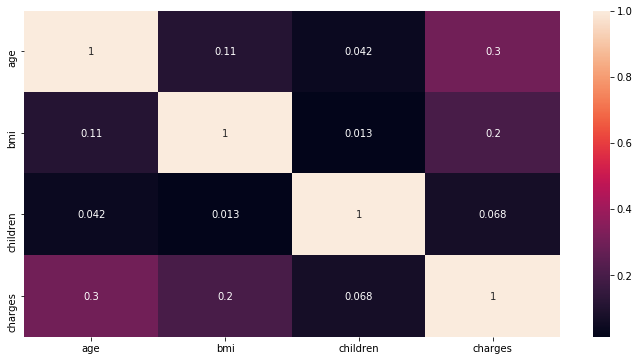

In [42]:
#Heatmap
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(mif.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

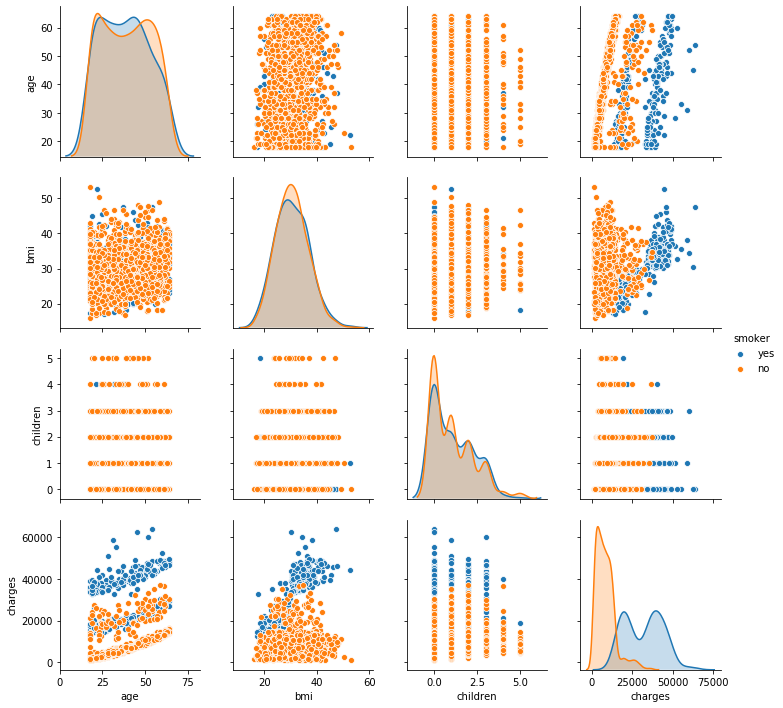

In [43]:
#Pairplot
sns.pairplot(mif,hue='smoker')
plt.show()

# Significant Features

In [55]:
mif.corr()['charges']
mif.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
#From the above EDA done we can evidently say that children,region,sex do not play an important role in medical insurance cost.
#i.e. they are not very significant hence we can drop these 3 columns and move forwad with predicting the medical insurances charges
#based on bmi,age and smoker.

In [56]:
#Dropping the insignificant features.
mif=mif.drop(columns=['region','sex','children'])
mif.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [57]:
#Converting categorical to numerical by get dummies.
mif=pd.get_dummies(mif,columns=['smoker'],drop_first=True)
mif.head()

,age,bmi,charges,smoker_yes
0,19,27.900,16884.92400,1
1,18,33.770,1725.55230,0
2,28,33.000,4449.46200,0
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


In [49]:
#Train-Test Split

In [58]:
X = mif.drop(['charges'], axis=1)
y = mif["charges"]

In [59]:
X.head()

,age,bmi,smoker_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [99]:
#Splitting the data into 70 annd 30 i.e. 30% of the data goes as testing and remaining goes as training.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

In [100]:
lr=LinearRegression()

In [109]:
#cross-val score to assess the effectiveness of the model.
cross=cross_val_score(lr,X_train,y_train,cv=5)
cross.mean()

0.7465120832076357

In [101]:
#Training the data on X_train and y_train
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#Calculating Test score
rs(y_test,lr.predict(X_test))

0.7349606898512976

In [105]:
#Here the cross val-score is somewhat around 75% and r2score on the test data is also 74% we can say that our model is performing 
#well.
#Although this could be further improved if we use DTR or RFR or Adaboost.